In [1]:
import ImageView: imshow
import Images: Gray
import TestImages: testimage

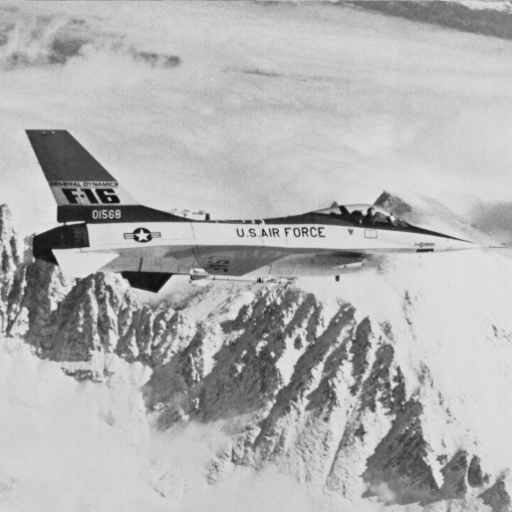

In [3]:
jetplane = 1*Gray.(testimage("jetplane"))

In [4]:
typeof(jetplane)

Matrix{Gray{Float32}} (alias for Array{Gray{Float32}, 2})

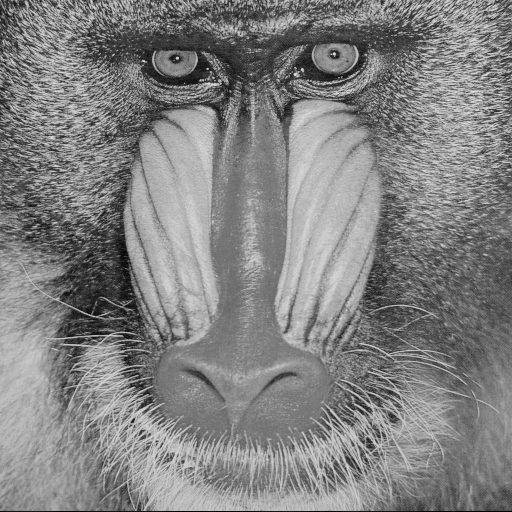

In [5]:
mandrill = 1*Gray.(testimage("mandrill"))

In [6]:
typeof(mandrill)

Matrix{Gray{Float32}} (alias for Array{Gray{Float32}, 2})

In [7]:
function normalize_image(im)
    im_res = im .- minimum(im)
    return (1/maximum(im_res))*im_res
end

normalize_image (generic function with 1 method)

In [8]:
m = convert(Matrix{Float32}, mandrill)

512×512 Matrix{Float32}:
 0.568627   0.219608   0.192157   0.34902   …  0.443137  0.6        0.694118
 0.454902   0.396078   0.156863   0.262745     0.509804  0.584314   0.490196
 0.301961   0.447059   0.180392   0.180392     0.392157  0.345098   0.317647
 0.278431   0.533333   0.372549   0.188235     0.286275  0.294118   0.27451
 0.341176   0.478431   0.517647   0.196078     0.231373  0.313726   0.337255
 0.321569   0.298039   0.623529   0.239216  …  0.333333  0.596078   0.713726
 0.168627   0.2        0.52549    0.509804     0.72549   0.776471   0.643137
 0.129412   0.2        0.435294   0.6          0.631373  0.470588   0.541176
 0.223529   0.188235   0.219608   0.458824     0.529412  0.611765   0.478431
 0.14902    0.12549    0.188235   0.25098      0.254902  0.317647   0.533333
 0.129412   0.168627   0.223529   0.145098  …  0.254902  0.286275   0.266667
 0.129412   0.184314   0.305882   0.141176     0.34902   0.290196   0.294118
 0.141176   0.262745   0.352941   0.254902     0.301

In [9]:
j = convert(Matrix{Float32}, jetplane)

512×512 Matrix{Float32}:
 0.756863  0.72549   0.698039  0.721569  …  0.647059  0.643137  0.576471
 0.74902   0.764706  0.760784  0.745098     0.698039  0.611765  0.545098
 0.756863  0.772549  0.760784  0.74902      0.745098  0.611765  0.54902
 0.733333  0.72549   0.72549   0.698039     0.819608  0.745098  0.643137
 0.701961  0.701961  0.698039  0.709804     0.815686  0.807843  0.72549
 0.678431  0.694118  0.694118  0.690196  …  0.780392  0.811765  0.776471
 0.694118  0.682353  0.670588  0.705882     0.666667  0.74902   0.768627
 0.666667  0.65098   0.658824  0.686275     0.6       0.67451   0.745098
 0.666667  0.643137  0.666667  0.647059     0.654902  0.698039  0.760784
 0.666667  0.666667  0.666667  0.654902     0.666667  0.705882  0.768627
 0.705882  0.690196  0.698039  0.67451   …  0.596078  0.65098   0.686275
 0.721569  0.682353  0.686275  0.662745     0.627451  0.654902  0.678431
 0.694118  0.721569  0.698039  0.713726     0.67451   0.737255  0.733333
 ⋮                          

In [10]:
import LinearAlgebra: transpose, norm

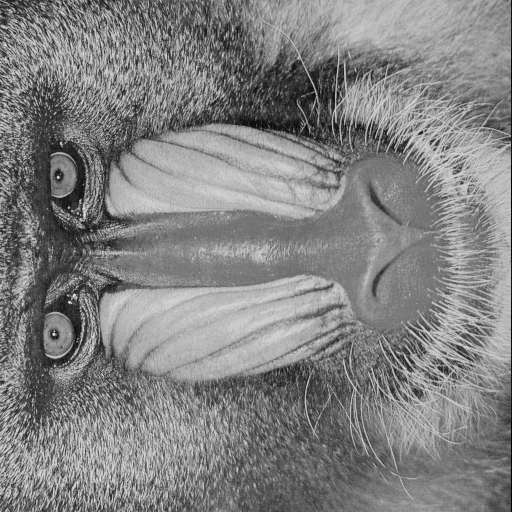

In [6]:
transpose(mandrill)

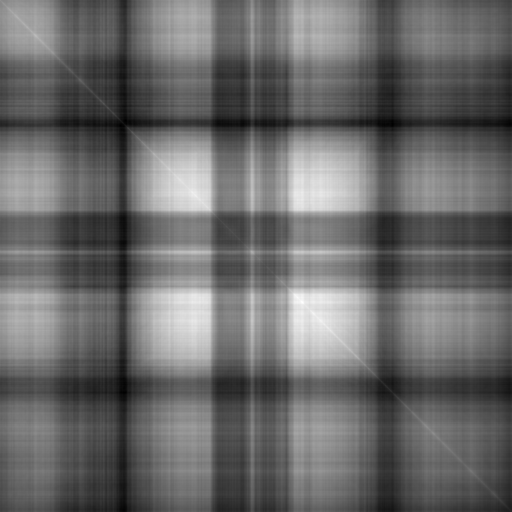

In [12]:
Gray.(normalize_image(transpose(m)*m))

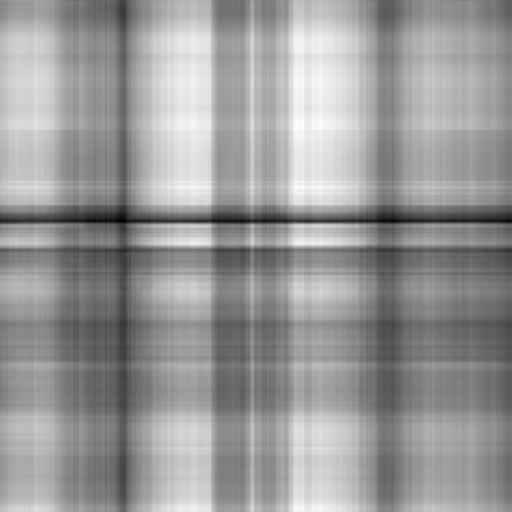

In [13]:
Gray.(normalize_image(j*m))

In [14]:
norm_columns(f, x) = f.(x) ./ sum(f.(x), dims=1)

norm_rows(f, x) = f.(x) ./ sum(f.(x), dims=2)

norm_rows (generic function with 1 method)

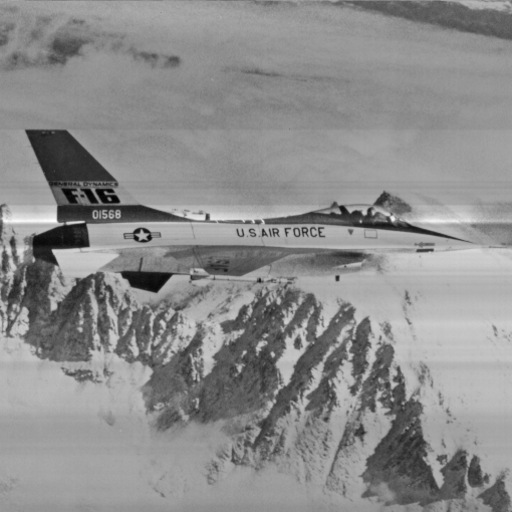

In [19]:
nr_j = normalize_image(norm_rows(x -> x+1, j))
Gray.(nr_j)

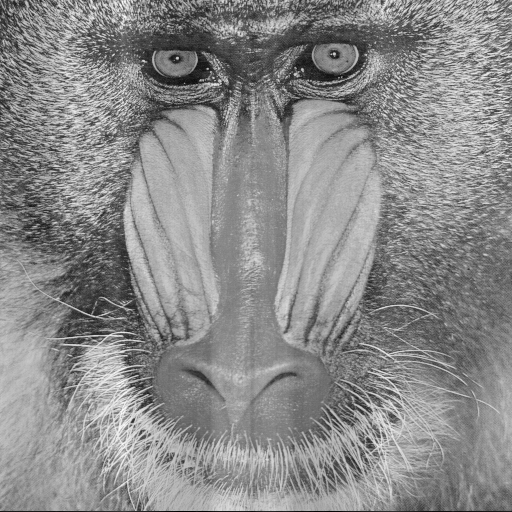

In [21]:
nc_m = normalize_image(norm_columns(x -> x+1, m))
Gray.(nc_m)

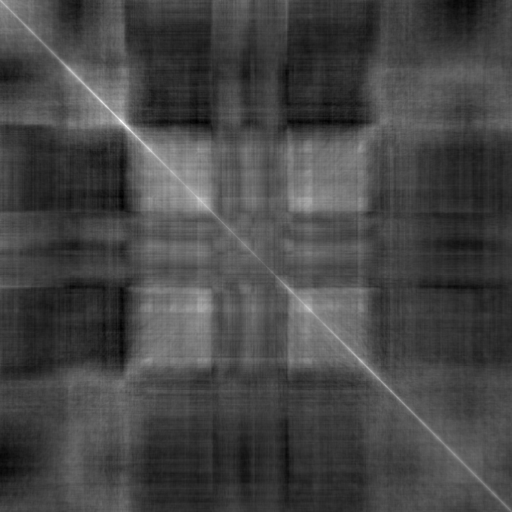

In [22]:
Gray.(normalize_image(transpose(nc_m)*nc_m))

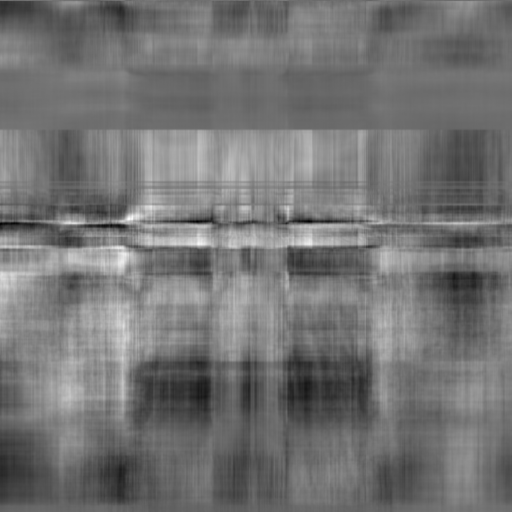

In [23]:
Gray.(normalize_image(nr_j*nc_m))

In [26]:
function warp3(x, y, p) # 0:31
    knob = p[:knob]
    clip(n, nsize) = max(min(nsize, n), 1)
    (xnew, ynew) =
        (clip(x + 10 * ((knob - 16) / 16) * sin(y/4), p[:xsize]), y)
    xnew, ynew
end

warp3 (generic function with 1 method)

In [27]:
function apply_warp(warp, im, p)
    (xsize, ysize) = size(im)
    p[:xsize] = xsize
    p[:ysize] = ysize
    function linear_interpolation(x_y)
        # a rough draft, this can be improved; works on im
        x = x_y[1]
        y = x_y[2]
        dx=mod(x,1)
        dy=mod(y,1)
        x_left = floor(Int,x)
        y_left = floor(Int,y)
        x_right = min(x_left + 1, xsize)
        y_right = min(y_left + 1, ysize)
        im[x_left,y_left]*(1-dx)*(1-dy) + im[x_left,y_right]*(1-dx)*dy + im[x_right,y_left]*dx*(1-dy) + im[x_right, y_right]*dx*dy
    end
    [linear_interpolation(warp(x,y,p)) for x in 1:xsize, y in 1:ysize]
end

apply_warp (generic function with 1 method)

In [28]:
pars = Dict(:knob=>0, :dummy=>0.0)
# at least one of the above should be float and not integer, so that the dictionary type is
# Dict{Symbol, Real}  and not Dict{Symbol, Int64}

Dict{Symbol, Real} with 2 entries:
  :dummy => 0.0
  :knob  => 0

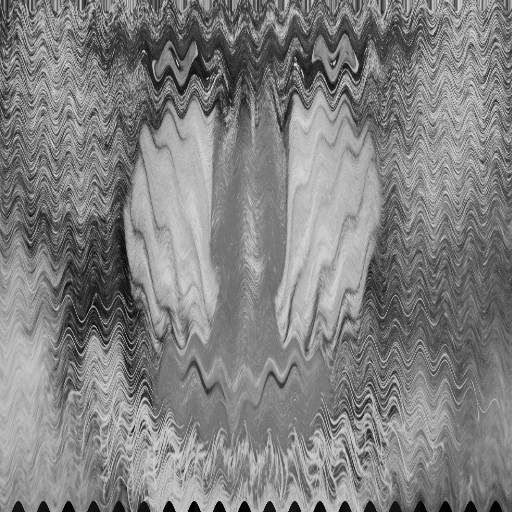

In [30]:
m_warped = apply_warp(warp3, m, pars)
Gray.(m_warped)

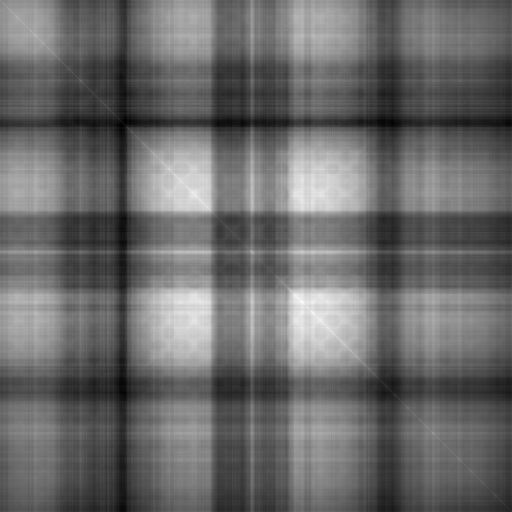

In [31]:
Gray.(normalize_image(transpose(m_warped)*m_warped))

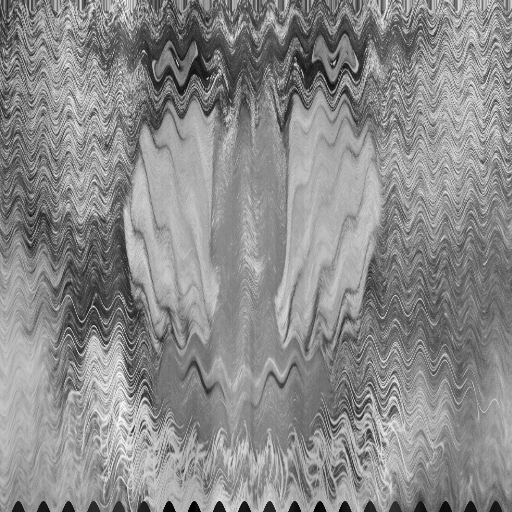

In [32]:
nc_m_warped = normalize_image(norm_columns(x -> x+1, m_warped))
Gray.(nc_m_warped)

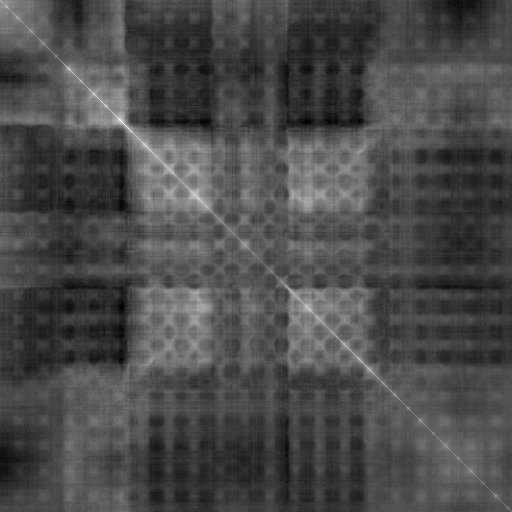

In [33]:
Gray.(normalize_image(transpose(nc_m_warped)*nc_m_warped))

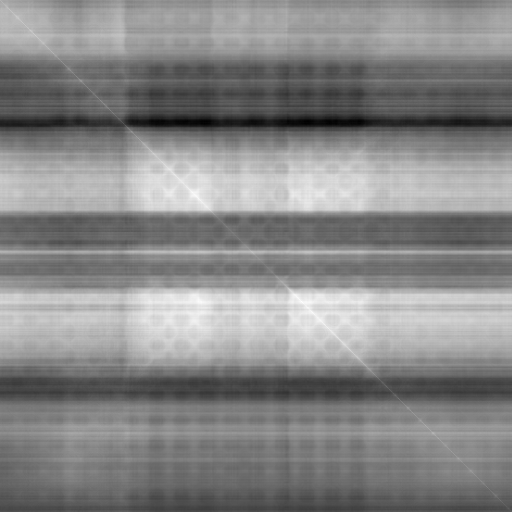

In [34]:
Gray.(normalize_image(transpose(m_warped)*nc_m_warped))

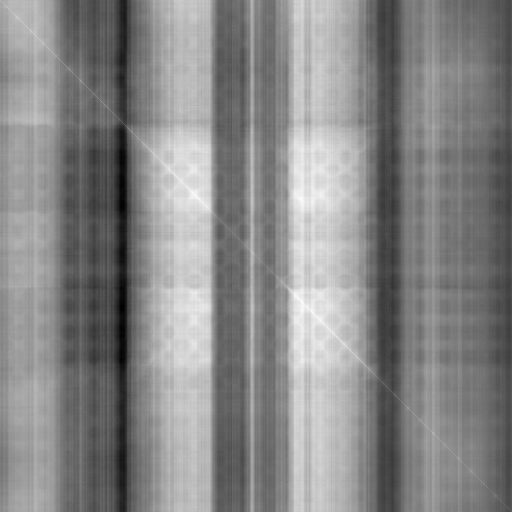

In [35]:
Gray.(normalize_image(transpose(nc_m_warped)*m_warped))

In [36]:
transposed_product(x) = normalize_image(transpose(x)*x)

transposed_product (generic function with 1 method)

In [39]:
value3(A) = transposed_product(norm_columns(x -> x+1, A))

value3 (generic function with 1 method)

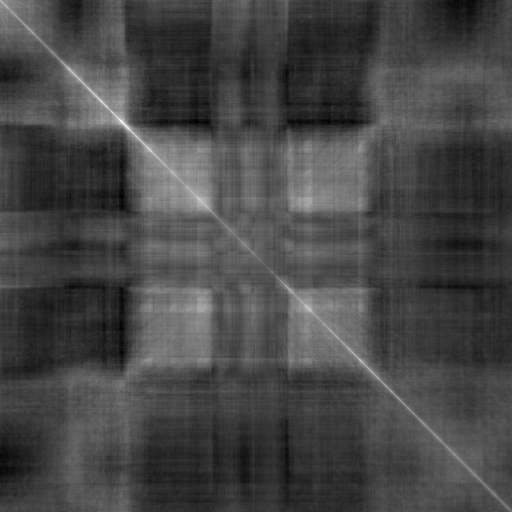

In [41]:
Gray.(value3(m))

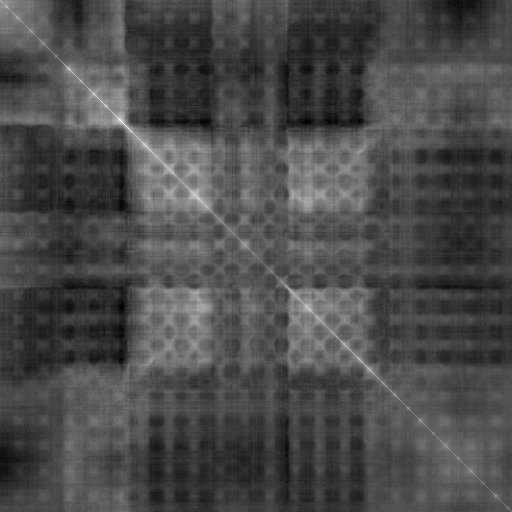

In [42]:
Gray.(value3(m_warped))

In [43]:
loss(x, y) = norm(value3(x) - y)

loss (generic function with 1 method)

In [44]:
using Flux

In [45]:
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())

In [46]:
import Flux.Optimise: update!

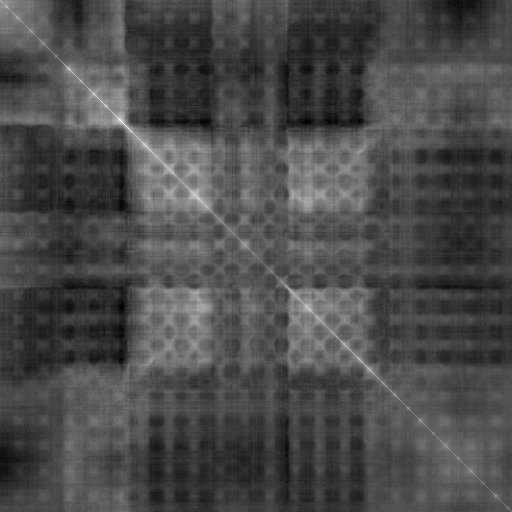

In [47]:
target_value = value3(m_warped)
Gray.(target_value)

In [48]:
loss(m, target_value)

20.39928388822998

In [49]:
function steps!(x, y, loss, opt, accum, n_steps = 1)
    for i = 1:n_steps
        p = params(x)
        push!(accum, deepcopy(x)) # I am unhappy about the loss of intermediate parameter values
        grads = gradient(()->loss(x, y), p)
        update!(opt, p, grads)
        println(loss(x, y))
    end
    loss(x, y)
end

steps! (generic function with 2 methods)

In [50]:
m_list = []

Any[]

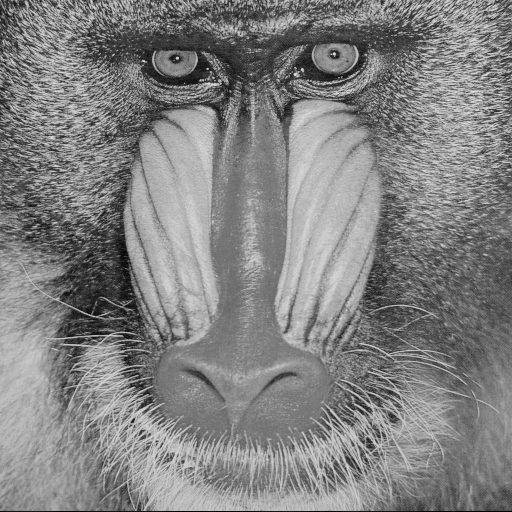

In [52]:
changing_m = deepcopy(m)
Gray.(changing_m)

In [69]:
steps!(changing_m, target_value, loss, opt, m_list, 30)

4.764338182783549
4.716083888872665
4.66827092597603
4.620964609744324
4.574106692523106
4.527717370848066
4.481807157508409
4.436322923024472
4.3913521319010265
4.346846259661113
4.30279845747215
4.259195216537462
4.216103876063615
4.173406664098262
4.131181997458953
4.089371570426532
4.0480312908895515
4.007085947715814
3.9665518098038373
3.926372762043811
3.8866421325350022
3.847288741355203
3.8082582575704045
3.7696367148873398
3.7313571162218615
3.6934724653451876
3.655914284891044
3.61870243878219
3.581855883980365
3.5453370719672757


3.5453370719672757

In [70]:
length(m_list)

130

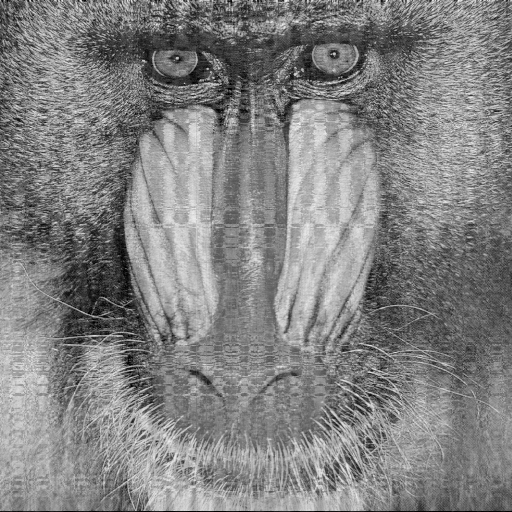

In [71]:
Gray.(changing_m)

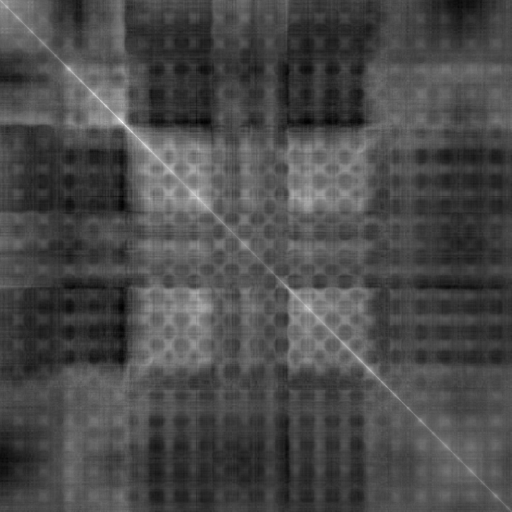

In [72]:
Gray.(value3(changing_m))